In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

# Step 1 - Create some data 

In [2]:
def create_sin_data(n=100, sigma_noise=0.1):
    x = np.random.rand(n, 1) * 2*pi  # Create uniform data
    noise = np.random.normal(scale=sigma_noise, size=n) # Create normal noise
    y = np.sin(x.reshape(-1)) + noise
    return x, y

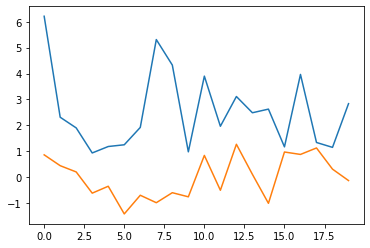

In [4]:
plt.plot(create_sin_data(n=20, sigma_noise=0.4)[0])
plt.plot(create_sin_data(n=20, sigma_noise=0.4)[1])

# Step 2 - Test/train split

In [5]:
np.random.seed(42)

nb_train = 10 #15
nb_test = 1000 #1000

x_train,y_train = create_sin_data(nb_train, 0.1)
x_test, y_test = create_sin_data(nb_test, 0.1)

# Step 3 - Learn different polynomial models according to eq 25 in the paper

In [6]:
class PolynomialMapping:
    def __init__(self, degree, add_ones=False):
        self.degree = degree
        self.add_ones = add_ones

    def __call__(self, x):
        n, d = np.shape(x)
        assert d == 1

        new_d = self.degree + (1 if self.add_ones else 0)
        new_x = np.ones((n, new_d))

        new_x[:, 0] = x[:, 0]
        for i in range(2, self.degree+1):
            new_x[:, i-1] = x[:, 0] ** i

        return new_x

# Step 4 - Bayesian regression

In [7]:
class BayesianRegression:
    def __init__(self, sigma_prior=1., sigma_post=1., pre_processor=None):
        self.sqr_sigma_prior = sigma_prior ** 2
        self.sqr_sigma_post = sigma_post ** 2
        self.pre_processor = pre_processor
        self.w = None

    def fit(self, x, y):
        if self.pre_processor is not None:
            x = self.pre_processor(x)

        n, d = np.shape(x)
        self.A = np.dot(x.T, x) / self.sqr_sigma_post + np.eye(d) / self.sqr_sigma_prior
        self.Ainv = np.linalg.pinv(self.A)
        self.w = np.dot(np.dot(self.Ainv, x.T), y.reshape(-1, 1)) / self.sqr_sigma_post
        self.w = self.w.reshape(-1)

        E = 0.5 * (np.sum((y - np.dot(x, self.w)) ** 2) / self.sqr_sigma_post)
        E += 0.5 * (np.dot(self.w, self.w) / self.sqr_sigma_prior)

        sgndetA, logdetA = np.linalg.slogdet(self.A)
        assert sgndetA == 1.0

        self.log_marginal_likelihood = - E - 0.5 * (logdetA + n * log(2 * pi * self.sqr_sigma_post) + d * log(self.sqr_sigma_prior))

        return self.w

    def predict(self, x, pre_processed=False):
        if self.pre_processor is not None and not pre_processed:
            x = self.pre_processor(x)

        return np.dot(x, self.w)



# Step 5 - Predicted models for different degrees 

In [8]:
#sin data 
x =  np.linspace(0, 2*pi, 200)
y = np.sin(x)

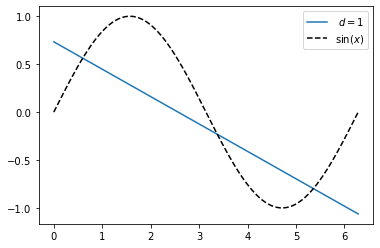

In [9]:
#polynomial model of degree d=1

polymap = PolynomialMapping(1, True)
clf = BayesianRegression(sqrt(1 / .005), 0.1, pre_processor=polymap) #sigma_prior = sqrt(1 / .005)
clf.fit(x_train, y_train)
marginal = -clf.log_marginal_likelihood

ypred1 = clf.predict(x.reshape(-1, 1))
plt.plot(x, ypred1, label=r' $d{=}%d$' % 1)

plt.plot(x, y, 'k--', label=r'$\sin(x)$') #plot the sin data 
plt.legend()
plt.show()



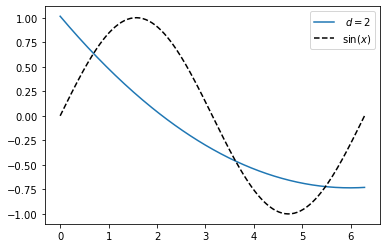

In [10]:
#polynomial model of degree d=2

polymap = PolynomialMapping(2, True)
clf = BayesianRegression(sqrt(1 / .005), 0.1, pre_processor=polymap) #sigma_prior = sqrt(1 / .005)
clf.fit(x_train, y_train)
marginal = -clf.log_marginal_likelihood

ypred2 = clf.predict(x.reshape(-1, 1))
plt.plot(x, ypred2, label=r' $d{=}%d$' % 2)

plt.plot(x, y, 'k--', label=r'$\sin(x)$') #plot the sin data 
plt.legend()
plt.show()



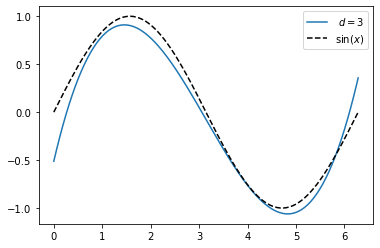

In [11]:
#polynomial model of degree d=3

polymap = PolynomialMapping(3, True)
clf = BayesianRegression(sqrt(1 / .005), 0.1, pre_processor=polymap) #sigma_prior = sqrt(1 / .005)
clf.fit(x_train, y_train)
marginal = -clf.log_marginal_likelihood

ypred3 = clf.predict(x.reshape(-1, 1))
plt.plot(x, ypred3, label=r' $d{=}%d$' % 3)

plt.plot(x, y, 'k--', label=r'$\sin(x)$') #plot the sin data 
plt.legend()
plt.show()



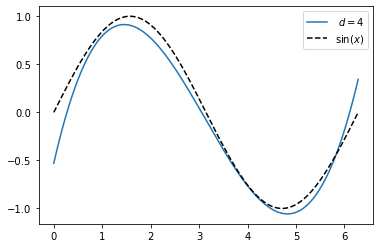

In [12]:
#polynomial model of degree d=4

polymap = PolynomialMapping(4, True)
clf = BayesianRegression(sqrt(1 / .005), 0.1, pre_processor=polymap) #sigma_prior = sqrt(1 / .005)
clf.fit(x_train, y_train)
marginal = -clf.log_marginal_likelihood

ypred4 = clf.predict(x.reshape(-1, 1))
plt.plot(x, ypred4, label=r' $d{=}%d$' % 4)

plt.plot(x, y, 'k--', label=r'$\sin(x)$') #plot the sin data 
plt.legend()
plt.show()



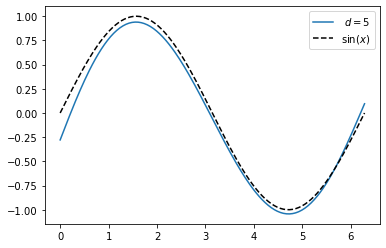

In [13]:
#polynomial model of degree d=5

polymap = PolynomialMapping(5, True)
clf = BayesianRegression(sqrt(1 / .005), 0.1, pre_processor=polymap) #sigma_prior = sqrt(1 / .005)
clf.fit(x_train, y_train)
marginal = -clf.log_marginal_likelihood

ypred5 = clf.predict(x.reshape(-1, 1))
plt.plot(x, ypred5, label=r' $d{=}%d$' % 5)

plt.plot(x, y, 'k--', label=r'$\sin(x)$') #plot the sin data 
plt.legend()
plt.show()


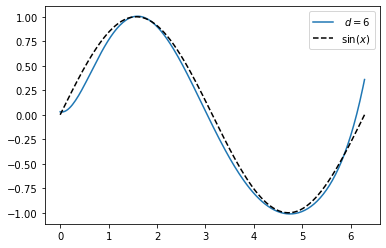

In [14]:
#polynomial model of degree d=6

polymap = PolynomialMapping(6, True)
clf = BayesianRegression(sqrt(1 / .005), 0.1, pre_processor=polymap) #sigma_prior = sqrt(1 / .005)
clf.fit(x_train, y_train)
marginal = -clf.log_marginal_likelihood

ypred6 = clf.predict(x.reshape(-1, 1))
plt.plot(x, ypred6, label=r' $d{=}%d$' % 6)

plt.plot(x, y, 'k--', label=r'$\sin(x)$') #plot the sin data 
plt.legend()
plt.show()



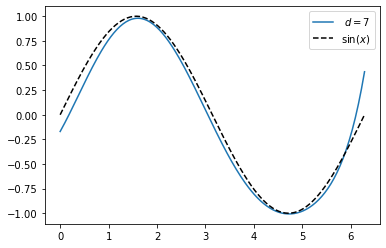

In [15]:
#polynomial model of degree d=7

polymap = PolynomialMapping(7, True)
clf = BayesianRegression(sqrt(1 / .005), 0.1, pre_processor=polymap) #sigma_prior = sqrt(1 / .005)
clf.fit(x_train, y_train)
marginal = -clf.log_marginal_likelihood

ypred7 = clf.predict(x.reshape(-1, 1))
plt.plot(x, ypred7, label=r' $d{=}%d$' % 7)

plt.plot(x, y, 'k--', label=r'$\sin(x)$') #plot the sin data 
plt.legend()
plt.show()



In [16]:
ypred_combined = [ypred1, ypred2, ypred3, ypred4, ypred5, ypred6, ypred7]
arrays = [np.array(x) for x in ypred_combined]
ypred_std = [np.std(i) for i in zip(*arrays)]

In [17]:
ypred_mean = [np.mean(k) for k in zip(*arrays)]
std_mean_pos = [sum(x) for x in zip(ypred_mean, ypred_std)]
std_mean_neg = [m - n for m,n in zip(ypred_mean, ypred_std)]

In [18]:
ypred_median = [np.median(k) for k in zip(*arrays)]
std_med_pos = [sum(x) for x in zip(ypred_median, ypred_std)]
std_med_neg = [m - n for m,n in zip(ypred_median, ypred_std)]

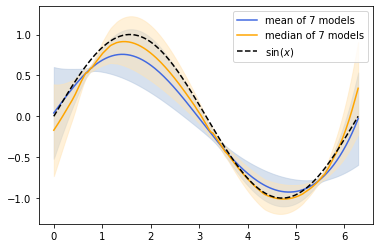

In [19]:

plt.plot(x, ypred_mean, color = 'royalblue', label='mean of 7 models')
plt.fill_between( x,std_mean_pos, std_mean_neg, color = 'lightsteelblue', alpha = 0.5)

plt.plot(x, ypred_median, color = 'orange', label='median of 7 models')
plt.fill_between( x,std_med_pos, std_med_neg, color = 'moccasin', alpha = 0.5)

plt.plot(x, y, 'k--', label=r'$\sin(x)$') #plot the sin data 

plt.legend()
plt.show()